copyright 2022: *Grzegorz Gwardys, Warsaw University of Technology*<br>
(Jupyter notebook addressed to students of: GSN)

# O notatniku

Notatnik zakłada odbycie wykładów z przedmiotu GSN dot. sieci konwolucyjnych (splotowych), czyli obycia z takimi terminami jak warstwa konwolucyjna, czy maxpooling. Z drugiej strony notatnik jest zamkniętą całością tzn. wszystkie wspomniane pojęcia są w nim wyjaśniane. Niemniej, nie należy tego notatnika traktować jako substytutu wykładu, jest on materiałem komplementarnym, powtarzającym (może w innej formie) wprowadzone na wykładzie pojęcia. Jest to też zgodne z sentencją repetitio est mater studiorum (powtarzanie jest matką wiedzy).

Cała implementacja jest zrealizowana w numpy, aby "nie ukryć" szczegółów, które dydaktycznie są bardzo wartościowe. W notatniku są też ćwiczenia, konieczne do wykonania zadania na końcu - świadomego wykorzystania fragmentów kodu i przeprowadzenia treningu sieci.

In [5]:
%pip install jupyterthemes




Note: you may need to restart the kernel to use updated packages.


# ChangeLog

## v2

- poprawka dodawania wartości biasu w warstwie konwolucyjnej

# Konwolucja (splot)

## Przykład i intuicja

"Operacje konwolucji" (cudzysłów wyjaśnimy później) można rozumieć jako wymnażania stosownych elementów, między przesuwnym oknem filtru, a obrazkiem. W poniższym przykładzie w pierwszym kroku przystawiamy filtr 3x3 do lewego-górnego rogu obrazka 5x5 i wyznaczamy pierwszą z dziewięciu wartości poprzez produkt Hadamarda i zsumowanie wszystkich elementów:

$$ \text{sum}\begin{bmatrix} \begin{pmatrix} 7 & 2 & 3 \\ 4 & 5 & 3 \\ 3 & 3 & 2 \end{pmatrix} \odot \begin{pmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{pmatrix} \end{bmatrix} = \text{sum}\begin{pmatrix} 7*1 & 2*0 & 3*(-1) \\ 4*1 & 5*0 & 3*(-1) \\ 3*1 & 3*0 & 2*(-1) \end{pmatrix} = \text{sum}\begin{pmatrix} 7 & 0 & -3 \\ 4 & 0 & -3 \\ 3 & 0 & -2 \end{pmatrix} = 6 $$

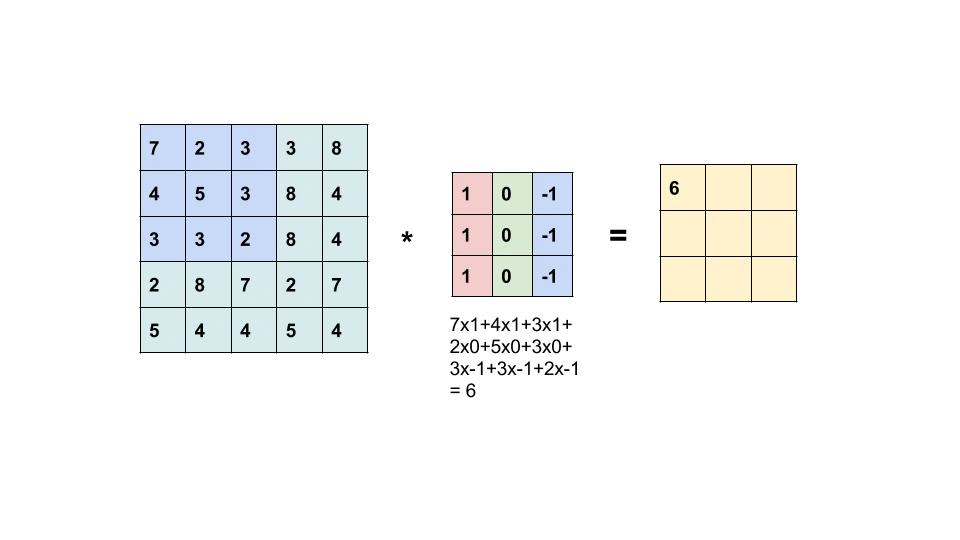

src: https://learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

Animacja przedstawiająca całość operacji:

![conv-animation](https://learnopencv.com/wp-content/uploads/2017/11/convolution-example-matrix.gif)

src: https://learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

Jaki jest cel tej operacji? W klasycznym przetwarzaniu obrazu możemy dobrać stosowny filtr i uzyskać oczekiwany efekt:

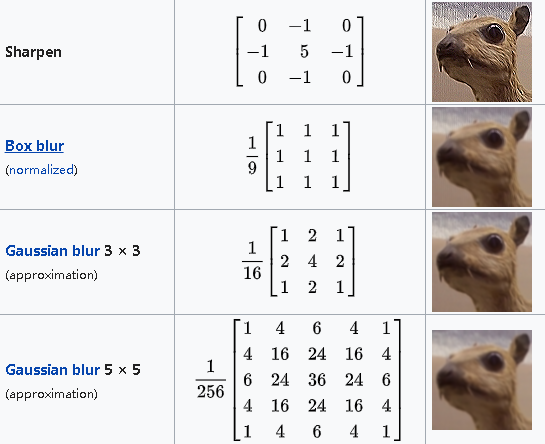

Niemniej w przypadku konwolucyjnych sieci neuronowych, będących głównym tematem tego notatnika, wartości filtrów (wielu filtrów!) są jednocześnie trenowalnymi wagami sieci! Po zakończeniu procedury uczenia mogą one wyglądać tak:



 ![filters](https://www.researchgate.net/publication/311368457/figure/fig1/AS:681692893282305@1539539659916/Filters-of-the-first-convolutional-layer-conv1-of-the-Convolutional-Neural-Networks.jpgdia.org/wikipedia/https://www.researchgate.net/publication/311368457/figure/fig1/AS:681692893282305@1539539659916/Filters-of-the-first-convolutional-layer-conv1-of-the-Convolutional-Neural-Networks.jpg)

src: https://www.researchgate.net/figure/Filters-of-the-first-convolutional-layer-conv1-of-the-Convolutional-Neural-Networks_fig1_311368457


Powyższe filtry pochodzą z pierwszej warstwy konwolucyjnej i są "typowe" w tym sensie, że odpowiedzialne za "odkrywanie prymitywów" takich jak np. różne orientacje krawędzi.

Filtry bliższe końca wyjścia sieci "nabierają semantyki":

 ![hierarchy](https://pantelis.github.io/cs677/docs/common/lectures/deep-learning-introduction/images/hierarchical-features-classification.png)


src: https://pantelis.github.io/cs677/docs/common/lectures/deep-learning-introduction/

Powyższy temat można pogłębić korzystając z poniższego demonstratora:

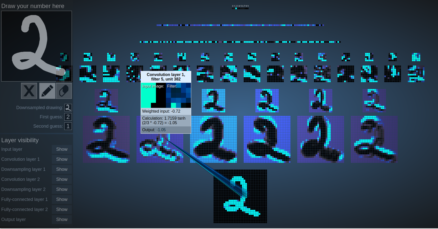

https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html

### Ćwiczenie 1

Pobierz obrazek pieska z: https://i.stack.imgur.com/B2DBy.jpg , następnie wczytaj go w skali szarości, aby dokonać filtracji. W tym celu posłuż się: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html (niech `mode='same'`)

Niech filtrem będzie horyzontalny lub wertykalny [operatora Sobela](https://en.wikipedia.org/wiki/Sobel_operator).

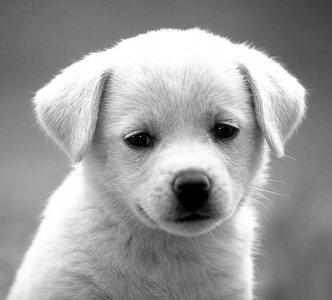

In [9]:
from PIL import Image
img = Image.open('B2DBy.jpg').convert('L')
img

In [37]:
import numpy as np
from matplotlib import pyplot

In [54]:
from scipy import signal
from scipy import misc
rng = np.random.default_rng()
face = misc.face(gray=True) - misc.face(gray=True).mean()
# face = img
# face = np.array(img)
face = np.asarray(img)
face = face.astype('float64')
# face
# print(face)
# image2 = Image.fromarray(face)
# pyplot.imshow(face)
# template = np.copy(face[100:165, 170:250])  # right eye
# template -= template.mean()
template = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# corr = signal.correlate2d(face, template, boundary='symm', mode='same')
corr = signal.correlate2d(face, template, mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

<ipython-input-55-39b723b4fd31>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


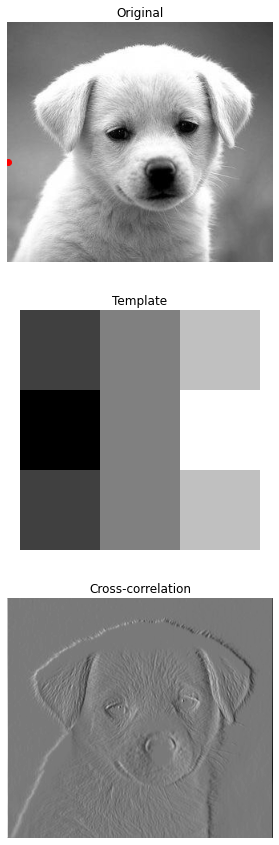

In [55]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

## To nie był splot

Wracając do samej operacji konwolucji (splotu), tą sekcję zaczęliśmy zdaniem:
```
"Operacje konwolucji" (cudzysłów wyjaśnimy później) ...
```

Skąd cudzysłów? Ponieważ w istocie nie jest to operacja konwolucji, choć często można się z takim uproszczeniem spotkać, choćby na bardzo popularnym kursie Uniwersytetu Stanforda [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/), w ramach którego popełniono bardzo fajny [tutorial dot. sieci konwolucyjnych](https://cs231n.github.io/convolutional-networks/), gdzie te uproszczenie się konsekwentnie stosuje.

Niemniej, z uwagi na nasze potrzeby implementacyjne, musimy wejść w szczegóły i nie poprzestawać na takim uproszczeniu. Otóż w istocie poniższa operacja: 



![conv-animation](https://learnopencv.com/wp-content/uploads/2017/11/convolution-example-matrix.gif)

src: https://learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

Jest operacją korelacji wzajemnej/krzyżowej (ang. [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation)) . Abyśmy mogli mówić o operacji konwolucji (splotu), musielibyśmy dodatkowo dokonać rotacji o $180^{\circ}$ filtru, przed wszystkimi omówionymi wcześniej krokami. Czyli operacja splotu obrazka z filtrem:

$$\begin{pmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{pmatrix}$$ 

Oznacza dokonanie operacji korelacji wzajemnej z filtrem:

$$\begin{pmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{pmatrix}$$ 

Czyli przyjmując za operacje splotu $\ast$, a za operacje korelacji wzajmnej $\star$, możemy zapisać następującą równość:

$$ \text{input} \ast K = \text{input} \star \text{rot180}(K) $$

Gdzie przez $\text{input}$ rozumiemy nasze wejście (np. zdjęcie), a przez $K$ oznaczamy filtr (ang. **K**ernel).

<font color=red>Od tego momentu, podobnie jak w przypadku wspomnianego wyżej kursu Stanfordu, za "główną operacje notatnika" będziemy w istocie rozumieć operacje korelacji wzajmnej oznaczanej przez $\star$.</font>

### Ćwiczenie 2

Powtórz Ćwiczenie 1, tym razem korzystając nie z `signal.correlate2d`, a `signal.convolve2d`. Jaką widzisz różnice między wynikami filtracji?

<ipython-input-57-9f624fe2a3a0>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


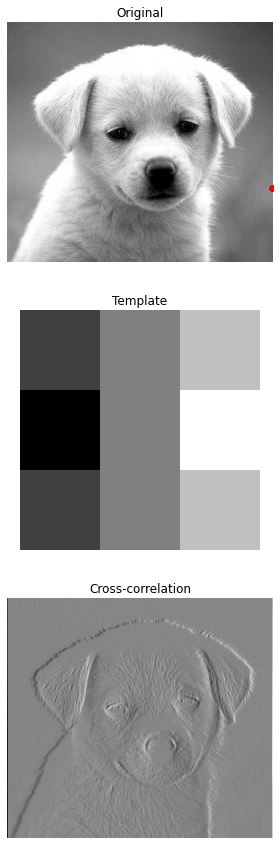

In [57]:
from PIL import Image
import numpy as np
from matplotlib import pyplot
from scipy import signal
from scipy import misc

img = Image.open('B2DBy.jpg').convert('L')
face = np.asarray(img)
face = face.astype('float64')
filt = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
###
corr = signal.convolve2d(face, filt, mode='same')
###
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

## Padding, stride, rozmiar wyjścia

Kolejnym przemilczanym do tej pory zagadnieniem jest sposób, w jaki umiejscowiamy filtr na obrazku. Po pierwsze, możemy uzupełnić wejście zerami (ang. padding), aby filtr mógł wyjść poza jego granice, zwiększając tym samym rozmiar wyjścia:

![padding](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/arbitrary_padding_no_strides.gif?raw=true
)

src: https://github.com/vdumoulin/conv_arithmetic

Powyżej wejście (niebieski) jest uzupełniane "dwoma obramowaniami" zer, powodując że po wykonaniu konwolucji z filtrem o rozmiarze 4x4, rozmiar wyjścia (zielony) to 6x6 - w przypadku braku paddingu byłoby to 2x2. 

Inną kwestią jest sam rozmiar kroku przesuwania filtru (ang. stride):


![stride](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif?raw=true)

src: https://github.com/vdumoulin/conv_arithmetic

Powyżej widzimy przesunięcie o 2, tym samym powodując znacznie mniejszy rozmiar wyjścia.

Czy jest formuła na rozmiar wyjścia, w zależności od padding'u i stride'u? Zdecydowanie tak! Przy rozmiarze:

- wejścia $i$
- filtru $k$
- padding'u $p$
- stride'u $s$

Rozmiar wyścia $o$ wynosi: 

$$ o = \lfloor\frac{n+2p-k}{s}\rfloor+1$$

W tym temacie możemy też się spotkać z określeniami:
- valid padding: nie używamy w ogóle uzupełniania zerami (czyli nasz pierwszy przykład)
- same padding (half padding): używamy takiego uzupełniania zerami, aby rozmiar wyjścia był taki jak rozmiar wejścia, realizujemy to poprzez ustawienie padding'u $p=\lfloor\frac {k}{2}\rfloor$ (właśnie ta połówka wyjaśnia określenie half padding) oras $s=1$   
- full padding: największe możliwe uzupełnienie zerami, aby filtr jeszcze mógł "zahaczyć" o wejście (czyli by nie doszło do jego pełnego pokrycia się z dodanymi zerami), realizujemy to poprzez $p=k-1$ 






## Co w przypadku kolorowych zdjęć

Kolejnym zagadnieniem jest kwestia dość fundamentalna - co w przypadku, gdy wejściem jest np. obrazek RGB, a nie jednokanałowy tak jak miało to miejsce do tej pory i wszystko było realizowane na macierzach. W istocie przepis jest podobny jak wcześniej:
- głębokość wejścia (np. 3 w przypadku obrazka RGB) musi się zgadzać z głębokością filtru
- realizujemy "operacje konwolucji" dla każej "płaszczyzny" wejścia i odpowiadającej jej "płaszczyzny" filtru
- wyniki działania sumujemy, na końcu uzyskując pojedynczą płaszczyzę


Poniżej przykład "operacji konwolucji" (typu "valid") obrazka RGB o rozmiarze 5x5 z filtrem 3x3, realizowanej dla pierwszego kroku, gdy filtr jest przystawiony do lewego-górnego rogu: 




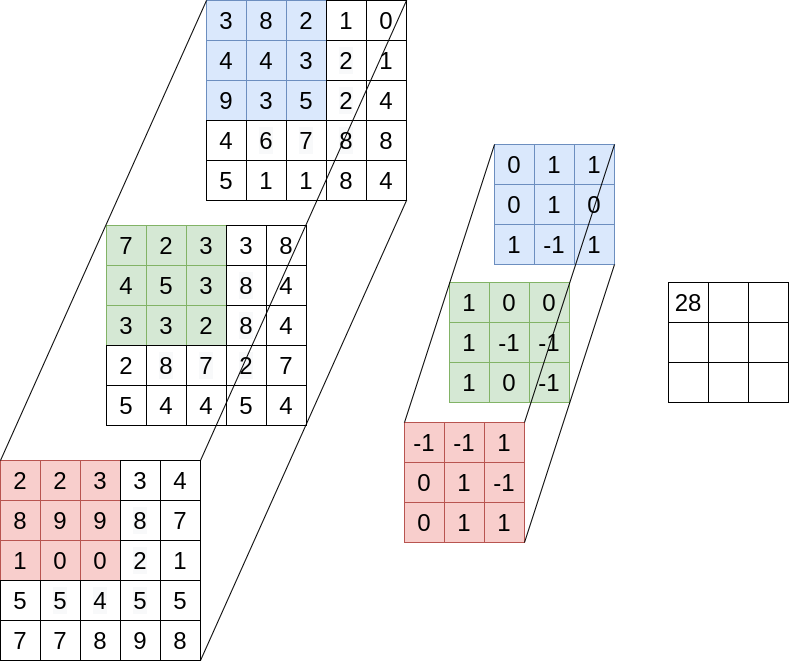

Dla kanału niebieskiego:


$$ \text{sum}\begin{bmatrix} \begin{pmatrix} 3 & 8 & 2 \\ 4 & 4 & 3 \\ 9 & 3 & 5 \end{pmatrix} \odot \begin{pmatrix} 0 & 1 & 1 \\ 0 & 1 & 0 \\ 1 & -1 & 1 \end{pmatrix} \end{bmatrix} = \text{sum}\begin{pmatrix} 3*0 & 8*1 & 2*1 \\ 4*0 & 4*1 & 3*0 \\ 9*1 & 3*(-1) & 5*1 \end{pmatrix} = \text{sum}\begin{pmatrix} 0 & 8 & 2 \\ 0 & 4 & 0 \\ 9 & -3 & 5 \end{pmatrix} = 25 $$

Dla kanału zielonego:

$$ \text{sum}\begin{bmatrix} \begin{pmatrix} 7 & 2 & 3 \\ 4 & 5 & 3 \\ 3 & 3 & 2 \end{pmatrix} \odot \begin{pmatrix} 1 & 0 & 0 \\ 1 & -1 & -1 \\ 1 & 0 & -1 \end{pmatrix} \end{bmatrix} = \text{sum}\begin{pmatrix} 7*1 & 2*0 & 3*0 \\ 4*1 & 5*(-1) & 3*(-1) \\ 3*1 & 3*0 & 2*(-1) \end{pmatrix} = \text{sum}\begin{pmatrix} 7 & 0 & 0 \\ 4 & -5 & -3 \\ 3 & 0 & -2 \end{pmatrix} = 4 $$

Dla kanału czerwonego:

$$ \text{sum}\begin{bmatrix} \begin{pmatrix} 2 & 2 & 3 \\ 8 & 9 & 9 \\ 1 & 0 & 0 \end{pmatrix} \odot \begin{pmatrix} -1 & -1 & 1 \\ 0 & 1 & -1 \\ 0 & 1 & 1 \end{pmatrix} \end{bmatrix} = \text{sum}\begin{pmatrix} 2*(-1) & 2*(-1) & 3*1 \\ 8*0 & 9*1 & 9*(-1) \\ 1*0 & 0*1 & 0*1 \end{pmatrix} = \text{sum}\begin{pmatrix} -2 & -2 & 3 \\ 0 & 9 & -9 \\ 0 & 0 & 0 \end{pmatrix} = -1 $$

I na końcu sumujemy, uzyskując pierwszą z dziewięciu wartości: $25+4+(-1)=28$

#Warstwa konwolucyjna

Tym sposobem dochodzimy do następnej części tego notatnika, jakim jest warstwa konwolucyjna. Skorzystamy tutaj z demonstratora zamieszczonego na: [Stanfordzkim tutorialu dot. sieci konwolucyjnych](https://cs231n.github.io/convolutional-networks/):

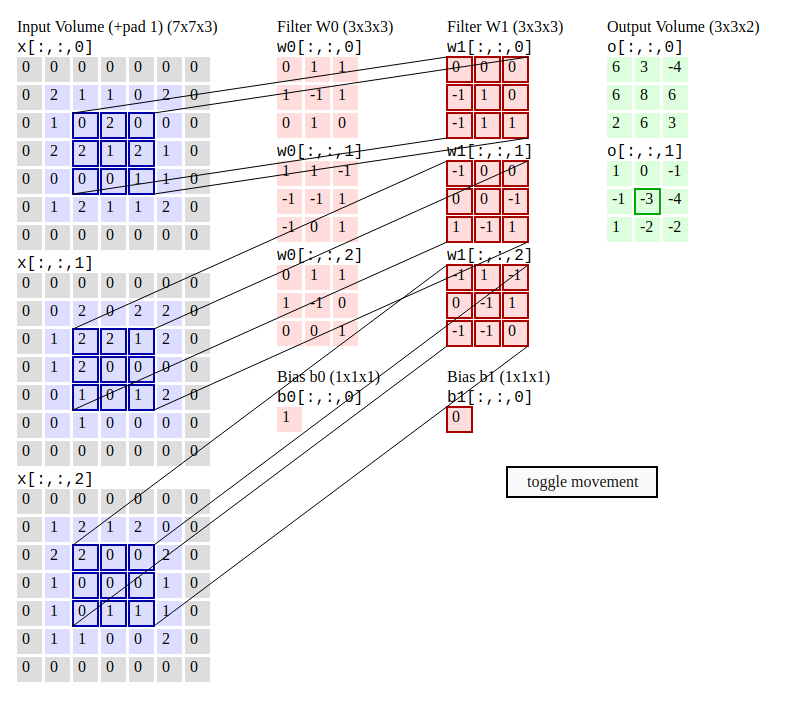

Powyżej widzimy "operacje konwolucji", gdzie wejście podobnie jak wcześniej ma głębokość $d=3$. W stosunku do poprzedniego przykładu widzimy dwie różnice:
- teraz są dwa filtry `W0` i `W1`, a tym samym są dwa wyjścia (zielone płaszczyzny)
- do końcowego wyniku jest dodawany wyraz wolny (bias)

Przedstawmy powyższy obrazek mniej granularnie:

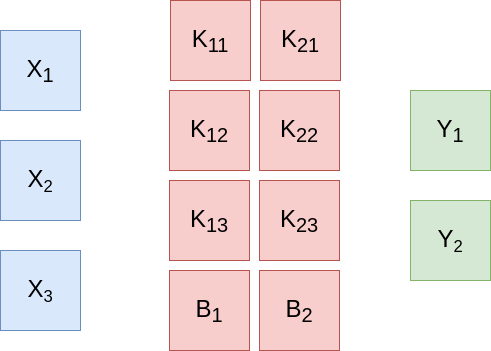

Matematycznie możemy naszą "operacje konwolucji" przedstawić w postaci operacji korelacji wzajemnej:

$$Y_1 = B_1 + X_1 \star K_{11} + X_2 \star K_{12} + X_3 \star K_{13} $$
$$Y_2 = B_2 + X_1 \star K_{21} + X_2 \star K_{22} + X_3 \star K_{23} $$

Uogólniając na dowolną liczbę wyjść $d$, oraz na dowolną liczbę wejść $n$:

$$Y_1 = B_1 + X_1 \star K_{11} + \cdots + X_n \star K_{1n} $$
$$Y_2 = B_2 + X_1 \star K_{21} + \cdots + X_n \star K_{2n} $$
$$\vdots $$
$$Y_d = B_d + X_1 \star K_{d1} + \cdots + X_n \star K_{dn} $$


Zwięźlej, dla $i = 1,2,\cdots,d $:

$$ Y_i = B_i + \sum_{j=1}^{n}X_j \star K_{ij}$$

Korzystając z tego kompaktowego zapisu, możemy przejść do implementacji metody `forward`:

```python
class Conv(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        self.input_depth, self.input_height, self.input_width = input_shape # taki musi być format kształtu wejścia: głębokość, wysokość, szerokość
        self.depth = depth # liczba wyjściowych płaszczyzny (czyli liczba filtrów)
        self.output_shape = (depth, self.input_height-kernel_size+1,self.input_width-kernel_size+1) # uproszczona implementacja, brak padding'u i stride'u, więc o = n-k+1 
        self.kernels_shape = (self.depth, self.input_depth, kernel_size, kernel_size) # liczba wyjściowych płaszczyzn (liczba filtrów), następnie głębokość wejścia (filtry muszą mieć ją taką samą), a potem rozmiary wysokości i szerokości filtru
        self.kernels = np.random.randn(*self.kernels_shape) -0.5 # inicjalizujemy losowo wagi filtrów (w przetwarzaniu obrazów móowa o konkretnych filtrach, tutaj zadaniem jest ich wyznaczenie podczas procedury treningu); odejmujemy 0.5, by mówić o przedziale -0.5, 0.5 
        self.biases = np.random.randn(*self.output_shape) - 0.5

    def forward(self, input):
        self.input = input # zapisujemy wejście - będzie potrzebne w backward
        self.output = np.zeros(self.output_shape)
        for i in range(self.depth): # dla każdej wyjściowej płaszczyzny (dla każdego filtru)
            for j in range(self.input_depth): # dla każdego kanału wejścia (np. dla R,G,B)
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i,j], "valid")
                # odnosimy się poprzez i do wyjściowej płaszczyzny, a przez j do danego kanału wejścia, przeprowadzamy operacje "konwolucji" (korelacji wzajemnej) typu valid między kanałem wejścia j, a odpowiadającym mu filtrowi i,j; sumujemy wyniki dla każdego kanału wejściowego 
            self.output[i] += self.biases[i]# następnie dodajemy stosowny bias
        return self.output

    def backward(self, output_gradient, learning_rate):
        pass
```

## Wielka trójka pochodnych i wyznaczenie $\frac{\partial E}{\partial K_{ij}}$

Podobnie jak w przypadku klasycznej sieci neuronowej, naszym głównym zadaniem jest implementacja metody `backward`, która bazuje na `output_gradient`, czyli $\frac{\partial E}{\partial Y_i}$. Również tutaj mamy do wyznaczenia:
- pochodne odpowiedzialne za aktualizacje wag: $\frac{\partial E}{\partial K_{ij}}$ i $\frac{\partial E}{\partial B_{i}}$
- pochodną, która w algorytmie wstecznej propagacji błędu stanie się `output_gradient` dla kolejnej (idąc w tył) warstwy, a na obecnej warstwie jest to $\frac{\partial E}{\partial X_j}$ 

W tym celu wrócimy do równania:

$$ Y_i = B_i + \sum_{j=1}^{n}X_j \star K_{ij} = B_i + X_1 \star K_{i1} + \cdots + X_n \star K_{in} $$


Zawężmy się do przypadku wejścia 1-kanałowego:

$$ Y_i = B_i + X_1 \star K_{i1}$$

Graficznie możemy to przedstawić tak:

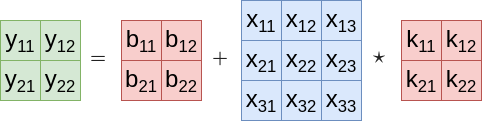

I jest to tożsame z poniższym układem równań:

$$y_{11} = b_{11} + k_{11}x_{11}+k_{12}x_{12} + k_{21}x_{21} + k_{22}x_{22}$$
$$y_{12} = b_{12} + k_{11}x_{12}+k_{12}x_{13} + k_{21}x_{22} + k_{22}x_{23}$$
$$y_{21} = b_{21} + k_{11}x_{21}+k_{12}x_{22} + k_{21}x_{31} + k_{22}x_{32}$$
$$y_{22} = b_{22} + k_{11}x_{22}+k_{12}x_{23} + k_{21}x_{32} + k_{22}x_{33}$$

Powyższy układ równań posłuży nam do wyznaczenia $\frac{\partial E}{\partial k_{11}}$: 

$$\frac{\partial E}{\partial k_{11}} = \frac{\partial E}{\partial y_{11}} \frac{\partial y_{11}}{\partial k_{11}} + \frac{\partial E}{\partial y_{12}} \frac{\partial y_{12}}{\partial k_{11}} + \frac{\partial E}{\partial y_{21}} \frac{\partial y_{21}}{\partial k_{11}} + \frac{\partial E}{\partial y_{22}} \frac{\partial y_{22}}{\partial k_{11}} $$

Łatwo zauważyć, że:

$$ \frac{\partial y_{11}}{\partial k_{11}} = x_{11} $$
$$ \frac{\partial y_{12}}{\partial k_{11}} = x_{12} $$
$$ \frac{\partial y_{21}}{\partial k_{11}} = x_{21} $$
$$ \frac{\partial y_{22}}{\partial k_{11}} = x_{22} $$

Więc:

$$\frac{\partial E}{\partial k_{11}} = \frac{\partial E}{\partial y_{11}} x_{11} + \frac{\partial E}{\partial y_{12}} x_{12} + \frac{\partial E}{\partial y_{21}} x_{21} + \frac{\partial E}{\partial y_{22}} x_{22} $$

Analogicznie podchodząc do $\frac{\partial E}{\partial k_{12}}$, $\frac{\partial E}{\partial k_{21}}$ i $\frac{\partial E}{\partial k_{22}}$ mamy wszystko: 

$$\frac{\partial E}{\partial k_{11}} = \frac{\partial E}{\partial y_{11}} x_{11} + \frac{\partial E}{\partial y_{12}} x_{12} + \frac{\partial E}{\partial y_{21}} x_{21} + \frac{\partial E}{\partial y_{22}} x_{22} $$

$$\frac{\partial E}{\partial k_{12}} = \frac{\partial E}{\partial y_{11}} x_{12} + \frac{\partial E}{\partial y_{12}} x_{13} + \frac{\partial E}{\partial y_{21}} x_{22} + \frac{\partial E}{\partial y_{22}} x_{23} $$

$$\frac{\partial E}{\partial k_{21}} = \frac{\partial E}{\partial y_{11}} x_{21} + \frac{\partial E}{\partial y_{12}} x_{22} + \frac{\partial E}{\partial y_{21}} x_{31} + \frac{\partial E}{\partial y_{22}} x_{32} $$

$$\frac{\partial E}{\partial k_{22}} = \frac{\partial E}{\partial y_{11}} x_{22} + \frac{\partial E}{\partial y_{12}} x_{23} + \frac{\partial E}{\partial y_{21}} x_{32} + \frac{\partial E}{\partial y_{22}} x_{33} $$

Przypatrując się tak powstałemu układowi równań możemy zauważyć, że jest on tożsamy z operacją wzajemnej korelacji!

$$ \begin{pmatrix} \frac{\partial E}{\partial k_{11}} & \frac{\partial E}{\partial k_{12}} \\ \frac{\partial E}{\partial k_{21}} & \frac{\partial E}{\partial k_{22}} \end{pmatrix} =  \begin{pmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \\ x_{31} & x_{32} & x_{33} \end{pmatrix} \star \begin{pmatrix} \frac{\partial E}{\partial y_{11}} & \frac{\partial E}{\partial y_{12}} \\ \frac{\partial E}{\partial y_{21}} & \frac{\partial E}{\partial y_{22}} \end{pmatrix} $$

Zwięźle możemy powyższe zapisać tak:

$$\frac{\partial E}{\partial K} = X \star \frac{\partial E}{\partial Y}$$

Tylko, że powyższe wyznaczenie jest poprawne dla uproszczonej wersji, gdzie mowa o pojedynczym kanale, podczas gdy oryginalne równanie jest następujące:

$$ Y_i = B_i + \sum_{j=1}^{n}X_j \star K_{ij}$$
$$\text{dla } i = 1,2,\cdots,d $$

Czyli rozpisując na układ równań:

$$Y_1 = B_1 + X_1 \star K_{11} + \cdots + X_n \star K_{1n} $$
$$Y_2 = B_2 + X_1 \star K_{21} + \cdots + X_n \star K_{2n} $$
$$\vdots $$
$$Y_d = B_d + X_1 \star K_{d1} + \cdots + X_n \star K_{dn} $$

Przy tak rozpisanym układzie równań i wcześniej wyznaczonej formule dla uproszczonej "operacji konwolucji":

$$ Y = B + X \star K \rightarrow \frac{\partial E}{\partial K} = X \star \frac{\partial E}{\partial Y} $$

Możemy policzyć człony dla dowolnego $\frac{\partial E}{\partial K_{ij}}$.


Przypatrzmy się $\frac{\partial E}{\partial K_{23}}$. W istocie mówimy o równaniu:

$$Y_2 = B_2 + X_1 \star K_{21} + \cdots + X_n \star K_{2n} $$

A skoro to trzeci kanał wejścia, to z powyższe równaniu interesuje nas tylko ten kawałek:

$$Y_2 = B_2 + X_3 \star K_{23} $$

Bo pochodna sumy, to suma pochodnych, więc wszędzie gdzie nie ma $K_{23}$ będą zera. 

W takim razie dochodzimy do naszej formuły na uproszczoną "operacje konwolucji", a więc:

$$\frac{\partial E}{\partial K_{23}} = X_3 \star \frac{\partial E}{\partial Y_2}$$

A to już możemy uogólnić na dowolny filtr i dowolny kanał wejściowy:


$$\frac{\partial E}{\partial K_{ij}} = X_j \star \frac{\partial E}{\partial Y_i}$$



## Wyznaczenie $\frac{\partial E}{\partial B_{i}}$

### Ćwiczenie 3

W analogiczny sposób, zaczynając od układu równań na $y_{11}$, $y_{12}$, $y_{21}$, $y_{22}$ i przypatrując się $\frac{\partial E}{\partial b_{11}}$, $\frac{\partial E}{\partial b_{12}}$, $\frac{\partial E}{\partial b_{21}}$, $\frac{\partial E}{\partial b_{22}}$ doprowadź do wyznaczenia $\frac{\partial E}{\partial B}$ dla uproszczonej formuły, a następnie dla ogólnego przypadku.

$$\frac{\partial E}{\partial B} = X_j \star \frac{\partial E}{\partial Y_i}$$

de/db = de/dy


## Wyznaczenie $\frac{\partial E}{\partial X}$

Do wyznaczenia $\frac{\partial E}{\partial X}$ znów posłużymy się podobną metodą, zaczynając od układu równań uproszczonej "operacji konwolucji":


$$y_{11} = b_{11} + k_{11}x_{11}+k_{12}x_{12} + k_{21}x_{21} + k_{22}x_{22}$$
$$y_{12} = b_{12} + k_{11}x_{12}+k_{12}x_{13} + k_{21}x_{22} + k_{22}x_{23}$$
$$y_{21} = b_{21} + k_{11}x_{21}+k_{12}x_{22} + k_{21}x_{31} + k_{22}x_{32}$$
$$y_{22} = b_{22} + k_{11}x_{22}+k_{12}x_{23} + k_{21}x_{32} + k_{22}x_{33}$$

Wyznaczmy $\frac{\partial E}{\partial x_{11}}$:

$$\frac{\partial E}{\partial x_{11}} = \frac{\partial E}{\partial y_{11}}\frac{\partial y_{11}}{\partial x_{11}} + \frac{\partial E}{\partial y_{12}}\frac{\partial y_{12}}{\partial x_{11}} + \frac{\partial E}{\partial y_{21}}\frac{\partial y_{21}}{\partial x_{11}} + \frac{\partial E}{\partial y_{22}}\frac{\partial y_{22}}{\partial x_{11}} $$

Możemy szybko zauważyć, że:
$$ \frac{\partial y_{11}}{\partial x_{11}} = k_{11} $$
$$ \frac{\partial y_{12}}{\partial x_{11}} = 0 $$
$$ \frac{\partial y_{21}}{\partial x_{11}} = 0 $$
$$ \frac{\partial y_{22}}{\partial x_{11}} = 0 $$

Więc $\frac{\partial E}{\partial x_{11}} = \frac{\partial E}{\partial y_{11}}k_{11}$

Postępując analogicznie wyliczamy komplet:

$$\begin{aligned} & \frac{\partial E}{\partial x_{11}} = \frac{\partial E}{\partial y_{11}} k_{11} \\ & \frac{\partial E}{\partial x_{12}} = \frac{\partial E}{\partial y_{11}} k_{12} + \frac{\partial E}{\partial y_{12}} k_{11} \\ & \frac{\partial E}{\partial x_{13}} = \frac{\partial E}{\partial y_{12}} k_{12} \\ & \frac{\partial E}{\partial x_{21}} = \frac{\partial E}{\partial y_{11}} k_{21} + \frac{\partial E}{\partial y_{21}} k_{11} \\ & \frac{\partial E}{\partial x_{22}} = \frac{\partial E}{\partial y_{11}} k_{22} + \frac{\partial E}{\partial y_{12}} k_{21} + \frac{\partial E}{\partial y_{21}} k_{12} + \frac{\partial E}{\partial y_{22}} k_{11} \\ & \frac{\partial E}{\partial x_{23}} = \frac{\partial E}{\partial y_{12}} k_{22} + \frac{\partial E}{\partial y_{22}} k_{12} \\ & \frac{\partial E}{\partial x_{31}} = \frac{\partial E}{\partial y_{21}} k_{21} \\ & \frac{\partial E}{\partial x_{32}} = \frac{\partial E}{\partial y_{21}} k_{22} + \frac{\partial E}{\partial y_{22}} k_{21} \\ & \frac{\partial E}{\partial x_{33}} = \frac{\partial E}{\partial y_{22}} k_{22}   \end{aligned}$$

Jest to bardzo ciekawy układ równań, bo okazuje się że w tym przypadku mówimy o prawdziwej operacji konwolucji, w dodatku typu full! Przypatrzmy się pierszym trzem równaniom na $\frac{\partial E}{\partial x_{11}}$, $\frac{\partial E}{\partial x_{12}}$ i $\frac{\partial E}{\partial x_{13}}$ w kontekście przesuwającego się filtru:


$$ \text{rot180} \begin{pmatrix} k_{11} & k_{12} \\ k_{21} & k_{22} \end{pmatrix} =  \begin{pmatrix} k_{22} & k_{21} \\ k_{12} & k_{11} \end{pmatrix}$$

po macierzy:

$$\begin{pmatrix} \frac{\partial E}{\partial y_{11}} & \frac{\partial E}{\partial y_{12}} \\ \frac{\partial E}{\partial y_{21}} & \frac{\partial E}{\partial y_{22}} \end{pmatrix}$$

Z dodatkowym padding'iem, tak jak już zostało wspomniane, mowa o paddingu typu full, czyli dla którego $p = k -1 = 2 - 1  = 1$.

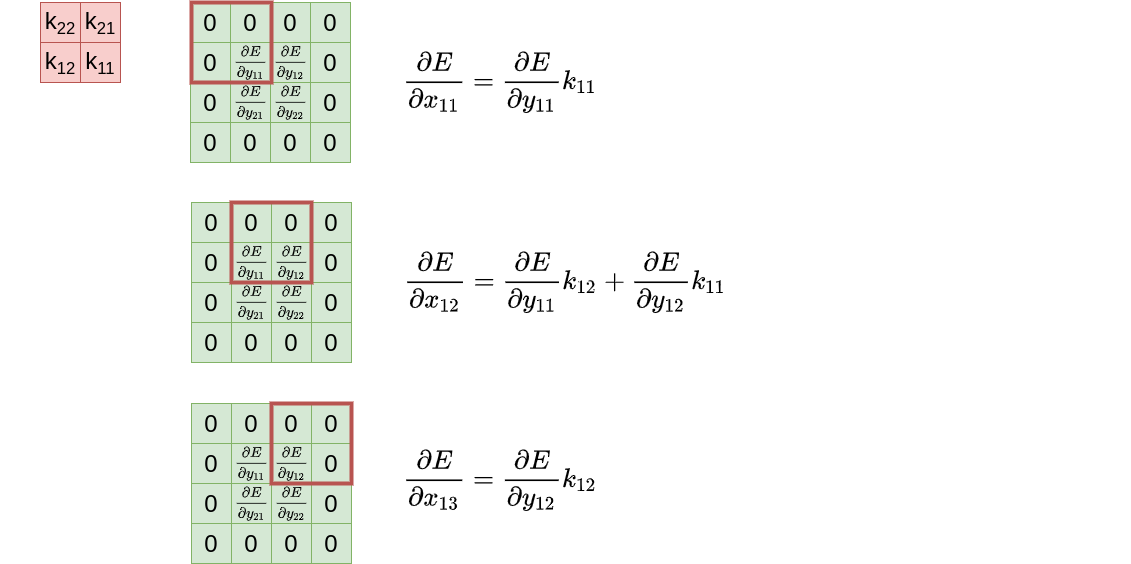

Czyli rzeczywiście, mówimy o rotacji filtru o $180^{\circ}$, a następnie o znanych nam działaniach z korelacji wzajemnej, operującej na macierzy uzupełnionej pojedynczym obramowaniem zer, co jest dla tego rozmiaru fitra przykładem full padding'u. Czyli zapisując to z wykorzystaniem korelacji wzajmnej: 

$$ \begin{pmatrix} \frac{\partial E}{\partial x_{11}} & \frac{\partial E}{\partial x_{12}} & \frac{\partial E}{\partial x_{13}} \\ \frac{\partial E}{\partial x_{21}} & \frac{\partial E}{\partial x_{22}} & \frac{\partial E}{\partial x_{23}} \\ \frac{\partial E}{\partial x_{31}} & \frac{\partial E}{\partial x_{32}} & \frac{\partial E}{\partial x_{33}} \end{pmatrix} = \begin{pmatrix} \frac{\partial E}{\partial y_{11}} & \frac{\partial E}{\partial y_{12}} \\ \frac{\partial E}{\partial y_{21}} & \frac{\partial E}{\partial y_{22}} \end{pmatrix} \underset{full}{\star} \begin{pmatrix} k_{22} & k_{21} \\ k_{12} & k_{11} \end{pmatrix}$$

Zakładając:

$$ \frac{\partial E}{\partial X} = \begin{pmatrix} \frac{\partial E}{\partial x_{11}} & \frac{\partial E}{\partial x_{12}} & \frac{\partial E}{\partial x_{13}} \\ \frac{\partial E}{\partial x_{21}} & \frac{\partial E}{\partial x_{22}} & \frac{\partial E}{\partial x_{23}} \\ \frac{\partial E}{\partial x_{31}} & \frac{\partial E}{\partial x_{32}} & \frac{\partial E}{\partial x_{33}} \end{pmatrix} $$

$$ \frac{\partial E}{\partial Y} = \begin{pmatrix} \frac{\partial E}{\partial y_{11}} & \frac{\partial E}{\partial y_{12}} \\ \frac{\partial E}{\partial y_{21}} & \frac{\partial E}{\partial y_{22}}  \end{pmatrix} $$


$$K = \begin{pmatrix} k_{11} & k_{12} \\ k_{21} & k_{22} \end{pmatrix}$$


Powyższe możemy zwięźlej ująć:

$$ \frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y} \underset{full}{\star} \text{rot180}(K) $$

A jeszcze zwięźlej, pierwszy raz w notatniku poświęconym Konwolucyjnym Sieciom Neuronowym zastosować operacje konwolucji bez cudzysłowu: 

$$ \frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y} \underset{full}{\star} \text{rot180}(K) = \frac{\partial E}{\partial Y} \underset{full}{\ast} K $$

Niemniej powyższa formuła jest poprawna dla "uproszczonej operacji konwolucji", czyli jedno-kanałowe wejście i jeden filtr, tak jak poprzednio będziemy dążyć do uogólnienia i tak wcześniej, skorzystamy sobie z tej formuły:

$$Y = B + X \star K \rightarrow \frac{\partial E}{\partial X} =  \frac{\partial E}{\partial Y} \underset{full}{\ast} K $$


Ostatni raz wrócimy do oryginalnego równania:

$$ Y_i = B_i + \sum_{j=1}^{n}X_j \star K_{ij}$$
$$\text{dla } i = 1,2,\cdots,d $$

I ponownie rozpiszmy je sobie na:

$$Y_1 = B_1 + X_1 \star K_{11} + \cdots + X_n \star K_{1n} $$
$$Y_2 = B_2 + X_1 \star K_{21} + \cdots + X_n \star K_{2n} $$
$$\vdots $$
$$Y_d = B_d + X_1 \star K_{d1} + \cdots + X_n \star K_{dn} $$

Chcąc wyznaczyć $\frac{\partial E}{\partial X_1}$, widzimy że $X_1$ pojawia się w wszystkich powyższych równaniach, więc trzeba dokonać sumy tych kontrybucji, z wykorzystaniem wcześniej wyznaczonej formuły $Y = B + X \star K \rightarrow \frac{\partial E}{\partial X} =  \frac{\partial E}{\partial Y} \underset{full}{\ast} K $:

$$ \frac{\partial E}{\partial X_1} = \frac{\partial E}{\partial Y_1} \underset{full}{\ast} K_{11} + \cdots + \frac{\partial E}{\partial Y_d} \underset{full}{\ast} K_{d1} $$


A to już możemy zgeneralizować na dowolny kanał wejścia $j$:



$$ \frac{\partial E}{\partial X_j} = \frac{\partial E}{\partial Y_1} \underset{full}{\ast} K_{1j} + \cdots + \frac{\partial E}{\partial Y_d} \underset{full}{\ast} K_{dj} $$




Zwięźlej:

$$ \frac{\partial E}{\partial X_j} = \sum_{i=1}^{d} \frac{\partial E}{\partial Y_i} \underset{full}{\ast} K_{ij}$$

## Implementacja metody backward

Podsumowując, w poprzednich sekcjach wyznaczyliśmy naszą wielką trójkę:
$$\begin{aligned} & \frac{\partial E}{\partial K_{ij}} = X_j \star \frac{\partial E}{\partial Y_i} \\ & \frac{\partial E}{\partial B_i} = \text{?} \\ & \frac{\partial E}{\partial X_j} = \sum_{i=1}^{d} \frac{\partial E}{\partial Y_i} \underset{full}{\ast} K_{ij}  \end{aligned} $$

Teraz możemy w końcu dokonać implementacji metody `backward`!

### Ćwiczenie 4

Dokończ implementacje metody backward:

```python
class Conv(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        self.input_shape = input_shape
        self.input_depth, self.input_height, self.input_width = input_shape 
        self.depth = depth 
        self.output_shape = (depth, self.input_height-kernel_size+1,self.input_width-kernel_size+1)  
        self.kernels_shape = (self.depth, self.input_depth, kernel_size, kernel_size) 
        self.kernels = np.random.randn(*self.kernels_shape) -0.5  
        self.biases = np.random.randn(*self.output_shape) - 0.5

    def forward(self, input):
        self.input = input 
        self.output = np.zeros(self.output_shape)
        for i in range(self.depth): 
            for j in range(self.input_depth): 
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i,j], "valid") 
            self.output[i] += self.biases[i]
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        ###
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i,j] = # TODO
                input_gradient[j] += # TODO
        self.kernels -= signal.correlate2d(self.input[j], self.kernels[i,j], "valid") 
        self.biases -= output_gradient
        ###
        return input_gradient

```

## Inna perspektywa

Na zakończenie tej sekcji, jeszcze jedna perspektywa: 

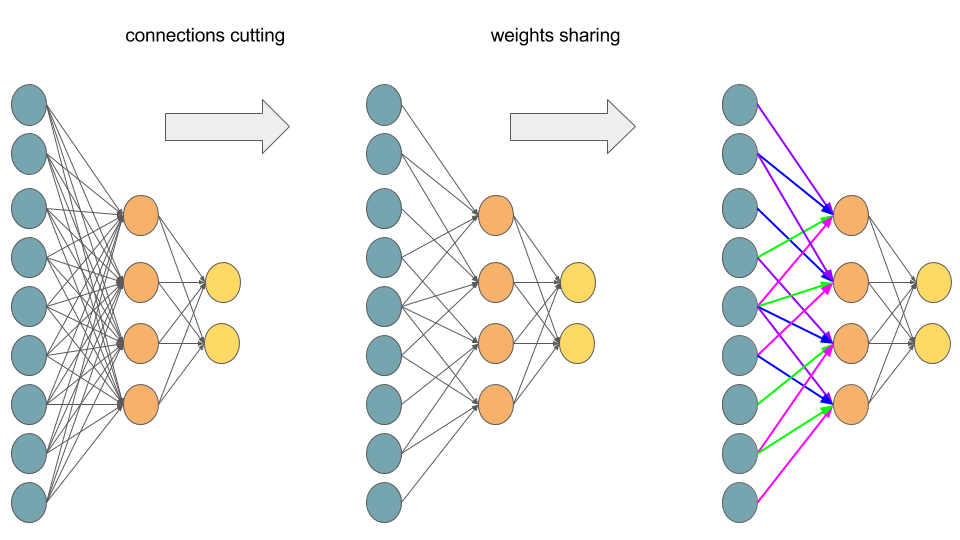

src: https://grzegorzgwardys.wordpress.com/2016/04/22/8/

Na warstwę konwolucyjną możemy spojrzeć, jak na szczególny przypadek warstwy gęstej - dokonując wycięcia stosownych połączeń i odpowiednio współdzieląc 4 wartości wag (kolory: niebieski, fioletowy, zielony i różowy). Tak zmodyfikowana wartwa gęsta jest tożsama z warstwą konwolucyjną: 

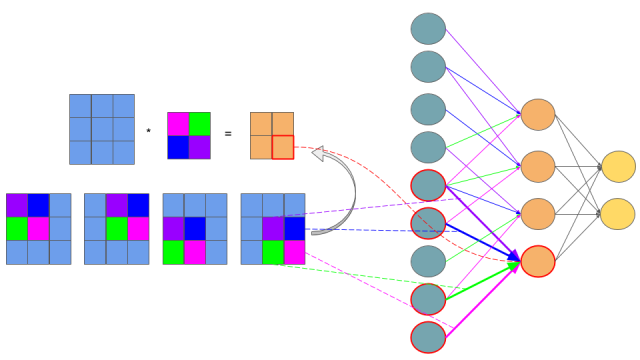

src: https://grzegorzgwardys.wordpress.com/2016/04/22/8/

Może nie jest to perspektywa nazbyt przydatna implementacyjnie, ale wydaje się ona ładnie łączyć świat klasycznych sieci neuronowych z konwolucyjnymi.

# Entropia skrośna

## Wersja binarna

W tej sekcji przyjrzymy się funkcji kosztu jaką jest entropia skrośna. Jej wersja binarna przedstawia się następująco:

$$E = -\frac{1}{n} \sum_{i=1}^{n}y_i^*log(y_i)+(1-y_i^*)log(1-y_i)$$

Powyżej wartości $y_i$ oraz $y_i^*$ to skalary, z czego $y_i^*$ to watość etykiety, która może wynosić $0$ lub $1$, natomiast $y_i$ to wartość wyjścia sieci, która jest w zakresie $(0,1)$. Sumujemy po $n$ przykładach trenujących, a właściwie to uśredniamy, poprzedzając to minusem.   

Rozpocznijmy to od szczególnego przypadku $\frac{\partial E}{\partial y_1}$:

$$\begin{align*}
\frac{\partial E}{\partial y_1} = \frac{\partial}{\partial y_1}[-\frac{1}{n} \sum_{i=1}^{n}y_i^*log(y_i)+(1-y_i^*)log(1-y_i)]  = && \text{dla wszystkich $y_i$ z wyjątkiem $y_1$ człony by się wyzerowały} \\ -\frac{1}{n}\frac{\partial}{\partial y_1} [y_1^*log(y_1)+(1-y_1^*)log(1-y_1)] = && \text{skorzystanie z pochodnej na logarytm i pochodnej f-cji złożonej} \\ -\frac{1}{n}(\frac{y_1^*}{y_1}-\frac{1-y_1^*}{1-y_1}) = \\ \frac{1}{n}(\frac{1-y_1^*}{1-y_1}-\frac{y_1^*}{y_1}) \end{align*}$$

Powyższe wyznaczenie możemy uogólnić na $\frac{\partial E}{\partial y_i}$:

$ \frac{\partial E}{\partial y_1} = \frac{1}{n}(\frac{1-y_1^*}{1-y_1}-\frac{y_1^*}{y_1}) \rightarrow \frac{\partial E}{\partial y_i} = \frac{1}{n}(\frac{1-y_i^*}{1-y_i}-\frac{y_i^*}{y_i}) $

Tym samym dochodzimy do zagadnienia implementacyjnego i mamy tu pewien formalny problem. Z jednej strony, nie mówimy o $n$ przykładach, bo nie mówimy o wsadzie (ang. batch) większym niż 1-elementowy. Więc nasza f-cja kosztu mogłaby się uprościć do:

$$E = -(y^*log(y)+(1-y^*)log(1-y))$$

Co więcej, w istocie nie mówimy o skalarach $y^*$ oraz $y$, a o wektorach $Y^*$ oraz $Y$ rozumianych jako:  

$$Y^* = \begin{pmatrix} y_1^* \\ y_2^*  \end{pmatrix} Y = \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}$$


I tutaj indeks dolny pełni już inną funkcję - nie mówimy o dwóch przykładach trenujących, a wyjściu sieci $Y$, które musi zawierać 2 elementy, bo mówimy o przypadku binarnym: $Y^* = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ lub $Y^* = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$.

Zauważmy, że podstawiając te wektory za skalary w równaniu na $E$, uzyskamy 2-elementowy wektor, o tych samych wartościach: 

In [ ]:
import numpy as np
y_true = np.array([1, 0]) # y*
y_pred = np.array([0.8, 0.2]) # y
-(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

array([0.22314355, 0.22314355])

Jest tak, ponieważ człon $Y^*log(Y)$  wynosi:

In [ ]:
y_true*np.log(y_pred) 

array([-0.22314355, -0.        ])

a człon $(1-Y^*)log(1-Y)$ to:

In [ ]:
(1-y_true)*np.log(1-y_pred)

array([-0.        , -0.22314355])

Czyli w naszym przypadku moglibyśmy wyznaczyć błąd biorąc wartość niezerową z jednego z tych członów, lub wyznaczając z nich średnią arytmetyczną, która jest bliźniaczo podobna do oryginalnego równania na binarną entropię skrośną: 

```python
def binary_cross_entropy(y_true, y_pred):
    return - np.mean(y_true*np.log(y_pred) + (1 - y_true) * np.log(1-y_pred))
```

W takim ujęciu dochodzimy do $\frac{\partial E}{\partial Y}$:

$\frac{\partial E}{\partial Y} = \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \end{pmatrix}$

I nasze poprzednie wyznaczenia, mimo że zmienił się charakter zmiennych (z wielu skalarnych przykładów trenujących, na jeden przykład 2-wymiarowy) pozostają w mocy (znika człon $\frac{1}{n}$, bo $n=1$):

$ \frac{\partial E}{\partial y_i} = \frac{1-y_i^*}{1-y_i}-\frac{y_i^*}{y_i} $

Tutaj też można zauważyć podobną symetrię jak wyżej, z powodu binarności któryś z członów się wyzeruje, a że $y_1 = 1 -y_2$, to też mowa o tych samych wartościach różniących się znakiem. $\frac{1-Y^*}{1-Y}$ wynosi:  

In [ ]:
(1 - y_true)/(1 - y_pred) 

array([0.  , 1.25])

a $\frac{- Y^*}{Y}$:

In [ ]:
- y_true/y_pred

array([-1.25,  0.  ])

Niemniej tutaj o żadnym wyborze wartości nie może być mowy, $\frac{\partial E}{\partial Y}$ musi być wektorem 2-wymiarowym, jesteśmy zobowiązani zwrócić całość:

In [ ]:
(1 - y_true)/(1 - y_pred) - y_true/y_pred

array([-1.25,  1.25])

Czyli implementacyjnie dodajemy do kodu na błąd, kod na $\frac{\partial E}{\partial Y}$ - `binary_cross_entropy_prime`:

```python
def binary_cross_entropy(y_true, y_pred):
    return - np.mean(y_true*np.log(y_pred) + (1 - y_true) * np.log(1-y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true)/(1 - y_pred) - y_true/y_pred)/np.size(y_true)
```

## Wersja wieloklasowa

Dwie klasy to mało, chcielibyśmy zwiększyć liczbę wyjść sieci $Y$:
$$Y^* = \begin{pmatrix} y_1^* \\ y_2^* \\ \vdots \\ y_i^* \end{pmatrix} Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_i \end{pmatrix}$$





$$ \frac{\partial E}{\partial Y} = \begin{pmatrix} \frac{\partial E}{\partial y_1} \\ \frac{\partial E}{\partial y_2} \\ \vdots \\ \frac{\partial E}{\partial y_i} \end{pmatrix}$$

Skrośną entropię na przypadek wieloklasowy możemy przedstawić następująco:

$$E = -\frac{1}{n} \sum_{i=1}^{n}\sum_{j=1}^{c}y_{ij}^*log(y_{ij})$$

Tutaj widzimy dodatkową sumę $\sum_{j=1}^{c}$, czym osiągamy uogólnienie na wiele klas. Tutaj też dochodzi do założenia, że $y_{i1} + y_{i2} + \cdots + y_{ic} = 1$, czyli podobnie jak w przypadku binarnym. I również jak w poprzednim przypadku, możemy dokonać uproszczenia związanego z 1-elementowym wsadem:

$$E = -\sum_{j=1}^{c}y_{j}^*log(y_{j})$$

### Ćwiczenie 5

Przypatrz się np. $\frac{\partial E}{\partial y_1}$, a następnie uogólnij do $\frac{\partial E}{\partial Y}$ 

Przechodząc do implementacji, przykład na 3 klasy:

In [ ]:
import numpy as np
y_true = np.array([1, 0, 0]) # y*
y_pred = np.array([0.6, 0.1, 0.3]) # y

Podstawiając pod wzór na f-cje kosztu E (jeszcze bez sumowania):

In [ ]:
y_true*np.log(y_pred)

array([-0.51082562, -0.        , -0.        ])

`y_true` to wektor typu one-hot, więc wartość niezerowa pojawi się tylko w miejscu poprawnej klasy. Sumowanie możemy w tym przypadku sprowadzić do iloczynu skalarnego: 

In [ ]:
np.dot(y_true,np.log(y_pred))

-0.5108256237659907

### Ćwiczenie 6

Dokończ poniższą implementacje:

```python
def multiclass_cross_entropy(y_true, y_pred):
    return - np.dot(y_true,np.log(y_pred)) 

def multiclass_cross_entropy_prime(y_true, y_pred):
    return # TODO

```

# Funkcja aktywacji

Ostania sekcja, a właściwie sekcyjka, dotyczy funkcji aktywacji jaką jest funkcja sigmoidalna - właśnie ją zastosujemy przy konstrukcji konwolucyjnej sieci neuronowej.

Wzór na funkcje sigmoidalną:

$$ \sigma (x) =  \frac{1}{1 + e^{-x}}  $$ 

A jej pochodna:


$$ \sigma^{'} (x) =  \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1-\sigma(x)) $$ 

Dla zainteresowanych szczegółami: [wyznaczenie pochodnej f-cji sigmoidalnej](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)

Graficznie wygląda to tak:


![logistic](https://miro.medium.com/max/1400/1*6A3A_rt4YmumHusvTvVTxw.png)

src: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

## Ćwiczenie 7

Dokończ implementacje:

```python
class Sigmoid(Activation):
    def __init__(self):
        sigmoid = lambda x: # TODO
        sigmoid_prime = lambda x: # TODO
        super().__init__(sigmoid, sigmoid_prime)
```

# Zadanie

Wytrenuj sieć:

```python
network = [
    Conv((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Softmax(input_size=10)
]
```
Gdzie wastwa `Reshape` wygląda następująco:

```python
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        return np.reshape(input, self.output_shape)

    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)
```





Niech zbiorem danych będzie MNIST: https://pjreddie.com/projects/mnist-in-csv/
Za funkcje kosztu należy przyjąć `multiclass_cross_entropy`.



# Materiały pomocniczo-uzupełniające

Jeśli Czytelnik/niczka chce pogłębić wiedzę, lub spojrzeć na tematy z innej perspektywy, poniżej zamieszczone są materiały przedmiotu GSN oraz materiały zewnętrzne.

Materiały Pana Prof. Skarbka powiązane tematycznie z lab2:
- [Funkcje kosztu i metryki - przegląd i kody](https://colab.research.google.com/drive/1A1ElHW4nvj_E7bMtI7tMXzwmw3CFVK9i?usp=sharing)
- [Neuronowe jednostki obliczeniowe](https://colab.research.google.com/drive/1IuLkLiInFX5sOxIT0toMrvOSSULj8FQe?usp=sharing)
- [Komponenty sieci CNN](https://colab.research.google.com/drive/19zcumqBCef7WSvIAN6gAb3L07nejR5lh?usp=sharing)
- [Jednostki normalizacyjne](https://colab.research.google.com/drive/1yemRBZO8WlnIQufIAyUQJ8r_U4JWWSFP?usp=sharing) 

Materiały zewnętrzne:
- [Convolutional Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
- [10. Introduction to Deep Learning with Computer Vision— Types of Convolutions & Atrous Convolutions](https://medium.com/hitchhikers-guide-to-deep-learning/10-introduction-to-deep-learning-with-computer-vision-types-of-convolutions-atrous-convolutions-3cf142f77bc0)
- [An Introduction to different Types of Convolutions in Deep Learning](https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d)

